# Support Vector Machines

In [3]:
import numpy as np
import pickle as pkl
from scipy import optimize
from scipy.linalg import cho_factor, cho_solve
import matplotlib.pyplot as plt
from utils import plotClassification, plotRegression, plot_multiple_images, generateRings, scatter_label_points, loadMNIST





## Loading the data

The file 'classification_datasets' contains 3 small classification datasets:
    
    - dataset_1: mixture of two well separated gaussians
    - dataset_2: mixture of two gaussians that are not separeted
    - dataset_3: XOR dataset that is non-linearly separable.
   
Each dataset is a hierarchical dictionary with the following structure:
        
        dataset = {'train': {'x': data, 'y':label}
                    'test': {'x': data, 'y':label}
                  }
The data $x$ is an $N$ by $2$ matrix, while the label $y$ is a vector of size $N$. 

Only the third dateset is used. 

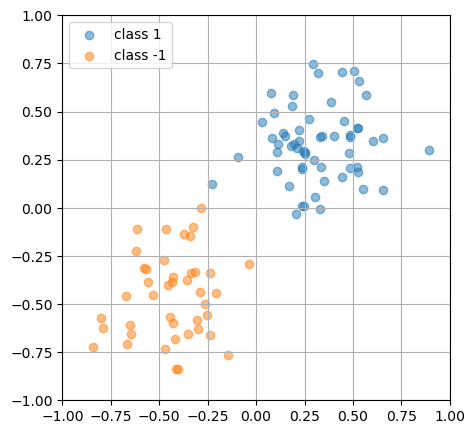

In [4]:
file = open('datasets/classification_datasets', 'rb')
datasets = pkl.load(file)
file.close()
dataset = datasets['dataset_1']

fig, ax = plt.subplots(1,1, figsize=(5, 5))
plotClassification(dataset['train']['x'], dataset['train']['y'], ax=ax)


## III- Kernel SVC 
### 1- Implementing the Gaussian Kernel
Implement the method 'kernel' of the class RBF below, which takes as input two data matrices $X$ and $Y$ of size $N\times d$ and $M\times d$ and returns a gramm matrix $G$ of shape $N\times M$ whose components are $k(x_i,y_j) = \exp(-\Vert x_i-y_i\Vert^2/(2\sigma^2))$. (The fastest solution does not use any for loop!)

In [5]:
class RBF:
    def __init__(self, sigma=1.):
        self.sigma = sigma  ## the variance of the kernel
    def kernel(self,X,Y):
        ## Input vectors X and Y of shape Nxd and Mxd
        return   np.exp(-np.power(np.linalg.norm(X[:,None,:]-Y[None,:,:],axis=2),2)/(2*self.sigma**2)) ## Matrix of shape NxM
    
class Linear:
    def kernel(self,X,Y):
        ## Input vectors X and Y of shape Nxd and Mxd
        return   X@Y.T ## Matrix of shape NxM


### 2- Implementing the classifier
Implement the methods 'fit' and 'separating_function' of the class KernelSVC below to learn the Kernel Support Vector Classifier.

In [15]:
class KernelSVC:
    def __init__(self, C, kernel, epsilon = 1e-3):
        self.type = 'non-linear'
        self.C = C                               
        self.kernel = kernel        
        self.alpha = None
        self.support = None
        self.epsilon = epsilon
        self.norm_f = None
        self.X = None
        self.y = None
    
    def fit(self, X, y):
       #### You might define here any variable needed for the rest of the code
        self.X = X
        self.y = y
        N = len(y)
        M = np.diag(y)@kernel(X,X)@np.diag(y)
        # Lagrange dual problem
        def loss(alpha):
            return  (1/2)*alpha.T@M@alpha - np.sum(alpha)#'''--------------dual loss ------------------ '''

        # Partial derivate of Ld on alpha
        def grad_loss(alpha):
            return  M@alpha - np.ones_like(alpha)# '''----------------partial derivative of the dual loss wrt alpha -----------------'''

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        fun_eq = lambda alpha: alpha.T@y # '''----------------function defining the equality constraint------------------'''        
        jac_eq = lambda alpha: y   #'''----------------jacobian wrt alpha of the  equality constraint------------------'''
        fun_ineq = lambda alpha: np.concatenate((C*np.ones_like(alpha) - alpha,alpha))  # '''---------------function defining the inequality constraint-------------------'''     
        jac_ineq = lambda alpha:  np.concatenate((-np.eye(N),np.eye(N))) # '''---------------jacobian wrt alpha of the  inequality constraint-------------------'''
        
        constraints = ({'type': 'eq',  'fun': fun_eq, 'jac': jac_eq},
                       {'type': 'ineq', 
                        'fun': fun_ineq , 
                        'jac': jac_ineq})

        optRes = optimize.minimize(fun=lambda alpha: loss(alpha),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda alpha: grad_loss(alpha), 
                                   constraints=constraints)
        self.alpha = optRes.x
        
        ## Assign the required attributes

        indices =  np.where((self.alpha>self.epsilon) & (self.alpha<C))[0]
        self.margin_points = X[indices,:] #'''------------------- A matrix with each row corresponding to a point that falls on the margin ------------------'''
        self.b =  np.mean(y[indices] - self.separating_function(self.margin_points))#''' -----------------offset of the classifier------------------ '''
        self.norm_f = self.alpha.T@kernel(X,X)@self.alpha # '''------------------------RKHS norm of the function f ------------------------------'''
        self.support = X[np.where(self.alpha>self.epsilon)[0],:]
        
    ### Implementation of the separting function $f$ 
    def separating_function(self,x):
        # Input : matrix x of shape N data points times d dimension
        # Output: vector of size N
        return np.sum(np.diag(self.y*self.alpha)@kernel(self.X,x),axis=0)

    def predict(self, X):
        """ Predict y values in {-1, 1} """
        d = self.separating_function(X)
        return 2 * (d+self.b> 0) - 1

### 2- Fitting the classifier

Run the code block below to fit the classifier and report its output.

Number of support vectors = 43


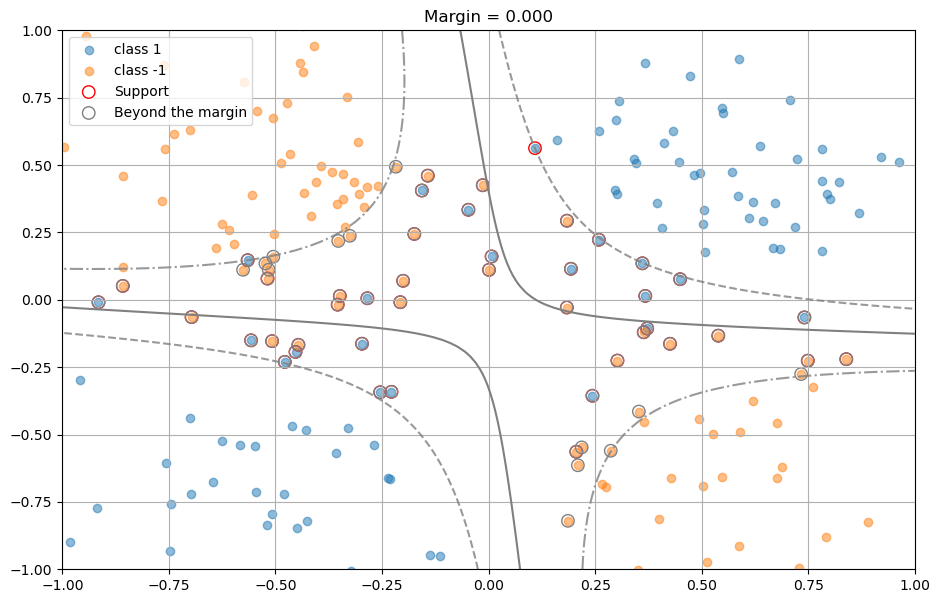

In [16]:
sigma = 1.5
C=100.
kernel = RBF(sigma).kernel
model = KernelSVC(C=C, kernel=kernel)
train_dataset = datasets['dataset_3']['train']
model.fit(train_dataset['x'], train_dataset['y'])
plotClassification(train_dataset['x'], train_dataset['y'], model, label='Training')
plt.savefig("results_SVC.pdf")

# Kernel Regression

## Loading the data

In [ ]:
file = open('datasets/regression_datasets', 'rb')
datasets = pkl.load(file)
file.close()
train_set = datasets['dataset_1']['train']
train_set = datasets['dataset_1']['test']
plotRegression(train_set['x'], train_set['y'],Y_clean= train_set['y_clean'])


## Kernel Ridge Regression
### 1- Implementing the regressor
Implement the method 'fit' of the classes KernelRR and MultivariateKernelRR below to perform Kernel Ridge Regression. 


In [ ]:
class KernelRR:
    
    def __init__(self,kernel,lmbda):
        self.lmbda = lmbda                    
        self.kernel = kernel    
        self.alpha = None 
        self.b = None
        self.support = None
        self.type='ridge'
        
    def fit(self, X, y):
        self.support = X
        self.b = 
        self.alpha =         
        
    ### Implementation of the separting function $f$ 
    def regression_function(self,x):
        # Input : matrix x of shape N data points times d dimension
        # Output: vector of size N
        return 

    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        return regression_function(X)+self.b

    
class MultivariateKernelRR:      
    def __init__(self,kernel,lmbda):
        self.lmbda = lmbda                    
        self.kernel = kernel
        self.support = None
        self.alpha = None
        self.b = None
        self.type='ridge'
    
    def fit(self, X, y):
        self.support = X
        self.b = 
        self.alpha =  
        
    ### Implementation of the separting function $f$ 
    def regression_function(self,x):
        # Input : matrix x of shape N data points times d dimension
        # Output: vector of size N
        return 
    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        return self.regression_function(X)+np.expand_dims(self.b,axis=0)
    

### 2- Fitting the regressor

Run the code block below to fit the regressor and report its output.

In [ ]:
sigma = 0.2
lmbda = .1
kernel = RBF(sigma).kernel
model = KernelRR(kernel, lmbda=lmbda)
model.fit(train_set['x'].reshape(-1,1),train_set['y'])
plotRegression(train_set['x'], train_set['y'], Y_clean= train_set['y_clean'], model=model, label='Train')

# Kernel PCA

### 1- Implementing kernel PCA
Implement the method 'fit' of the classes KernelSVR below to perform Kernel Support Vector Regression. 

In [ ]:
X = train_set['x']
N = X.shape[0]
K = kernel(X,X)
one_n = np.ones((N,N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)   

eigvals, eigvecs = scipy.linalg.eigh(K)

In [ ]:
eigvecs

In [ ]:
eigvals[::-1]

In [ ]:
K = kernel(X,X)
one_n = np.ones((N,N)) / N
K_1 = (np.eye(N)-one_n).dot(K).dot(np.eye(N)-one_n)
K_2 = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n) 
K_1

In [ ]:
scipy.linalg.norm(eigvecs[0])

In [ ]:
eigvecs_1 = [eigvecs[i]/np.sqrt(eigvals[i]) for i in range(eigvals.shape[0])] 

In [ ]:
eigvecs_2 = eigvecs/np.sqrt(eigvals)

In [ ]:
eigvecs_2[:, ::-1]

In [8]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [64]:
class KernelPCA:
    
    def __init__(self,kernel, r=2):                             
        self.kernel = kernel          # <---
        self.alpha = None # Matrix of shape N times d representing the d eingenvectors alpha corresp
        self.lmbda = None # Vector of size d representing the top d eingenvalues
        self.support = None # Data points where the features are evaluated
        self.r = r ## Number of principal components
    def compute_PCA(self, X):
        # assigns the vectors
        self.support = X
        N = X.shape[0]
        K = self.kernel(X,X)

        # center the Kernel matrix
        one_n = np.ones((N,N)) #/ N
        K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)   
        
        #Get the eigenvalues/ eigen vectors
        eigvals, eigvecs = np.linalg.eigh(K)

        # Sort the eigen vectors/values
        idx = eigvals.argsort()[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:,idx]
        
        idx = eigvals>0
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:,idx]
        
        # Normalize the eigenvalues
        eigvecs /= np.sqrt(eigvals)
 
        self.alpha = eigvecs
        self.lmbda = eigvals
    def transform(self,x):
        # Input : matrix x of shape N data points times d dimension
        # Output: vector of size N
        K = self.kernel(self.support,x)
        return K@self.alpha[:,:self.r]
    


### 2- Performing kernel PCA

Run the code block below apply a kernel PCA to a dataset consisting of three concentric rings and report the output. What can you conclude about this dataset?

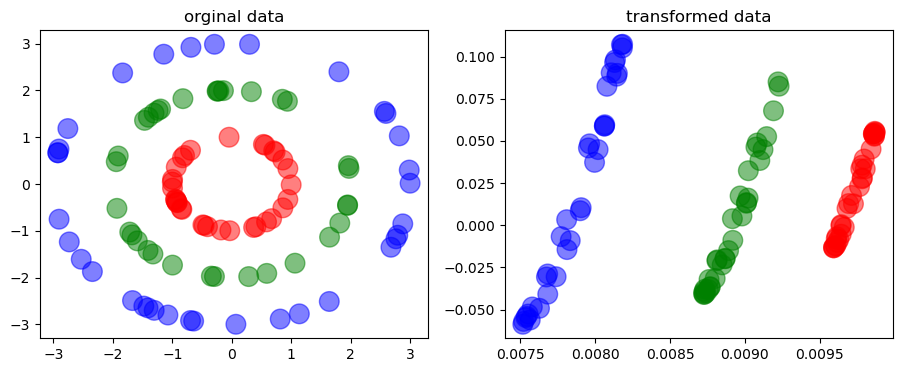

In [65]:
import scipy
file = open('datasets/pca_datasets', 'rb')
datasets = pkl.load(file)
file.close()
train_set = datasets['dataset_1']['train']
test_set = datasets['dataset_1']['test']

sigma = 4.
kernel = RBF(sigma).kernel
pca = KernelPCA(kernel, r=2)
pca.compute_PCA(train_set['x'])
pca_components = pca.transform(test_set['x'])

fig, ax = plt.subplots(1,2, figsize=(11, 4))
scatter_label_points(test_set['x'], test_set['y'], ax[0], title='orginal data')
scatter_label_points(pca_components,test_set['y'], ax[1], title= 'transformed data')
plt.savefig("result_kernel_PCA_non_normalized.pdf")

# Denoising 
### 1- Implementing a denoiser based on Kernel PCA and Kernel Ridge Regression
Implement the methods 'fit' and 'denoise' of the classes Denoiser below. 

In [ ]:
class Denoiser:
    def __init__(self, kernel_encoder, kernel_decoder,dim_pca, lmbda):
        self.pca = KernelPCA(kernel_encoder, r=dim_pca)
        self.ridge_reg = MultivariateKernelRR(kernel_decoder, lmbda= lmbda)
    
    def fit(self,train):

        
    def denoise(self,test):
        
        return 

### 2- Denoising MNIST dataset

Run the code block below to perform denoising of a subset of MNIST digits dataset and report the output. To what extend the denoising is successful? How can it be improved?

In [ ]:
datasets = loadMNIST('datasets/SubsetMNIST')
clean_data = datasets['cleanMNIST']
data = datasets['noisyMNIST']


dim_pca =80
lmbda = 10.
sigma_encoder =8.
sigma_decoder =.5
kernel_encoder = RBF(sigma_encoder).kernel
kernel_decoder = RBF(sigma_decoder).kernel
denoiser = Denoiser(kernel_encoder,kernel_decoder,dim_pca, lmbda)

denoiser.fit(data['train'])
pred = denoiser.denoise(data['test'])

plot_multiple_images(clean_data['test'])
plot_multiple_images(data['test'])
plot_multiple_images(pred)